In [1]:
cd ../src

c:\Users\jeong\Desktop\python\action-recognition-practice\src


In [2]:
import ffmpeg
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from time import time
import processing.nia2019v1 as nia

In [3]:
root_path = "../data/nia2019v1/raw"
output_path = "../data/nia2019v1/preprocessed"

In [4]:
metadata_list = nia.get_all_metadata(root_path)
metadata = metadata_list[0]
action = metadata.objects[0].actions[0]
print(metadata.filename)
print(metadata.video_filename)
action.name, action.starttime, action.duration, action.actor.position['keypoint']

c:\Users\jeong\Desktop\python\action-recognition-practice\data\nia2019v1\raw\[강도] 실내(크로마키)_01\178-1_robbery02_place02_night\178-1_cam01_robbery02_place02_night_spring.xml
c:\Users\jeong\Desktop\python\action-recognition-practice\data\nia2019v1\raw\[강도] 실내(크로마키)_01\178-1_robbery02_place02_night\178-1_cam01_robbery02_place02_night_spring.mp4


('threaten', 164.63333333333333, 1.7, (2114, 937))

In [5]:
resolution = "768x480"
other_info = action.actor.metadata.other_info
resolution_new = np.array(resolution.split('x')).astype('int')
resolution_origin = np.array((other_info['width'], other_info['height'])).astype(np.int)
ratio = resolution_new / resolution_origin

pos = np.array(action.actor.position['keypoint']) * ratio
crop_size = np.array((400, 400))

starttime = time()
config = {
    "hwaccel_output_format": "cuda",
    "c:v": "hevc_cuvid",
    "ss": action.starttime,
    "t": action.duration,
}
stream = ffmpeg.input(metadata.video_filename, **config)
stream = stream.filter('fps', fps=3, round='up')
stream = stream.filter('scale', size=resolution)
stream = stream.filter('crop', w=crop_size[0], h=crop_size[1], x=pos[0], y=pos[1])
stream = stream.output('pipe:', format='rawvideo', pix_fmt='rgb24')
frames, _ = stream.run(capture_stdout=True)
frames = (
    np
    .frombuffer(frames, np.uint8)
    .reshape([-1, crop_size[0], crop_size[1], 3])
)
frames.shape

(5, 400, 400, 3)

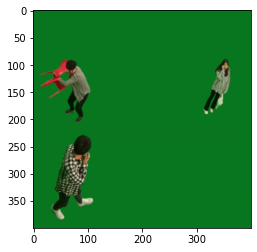

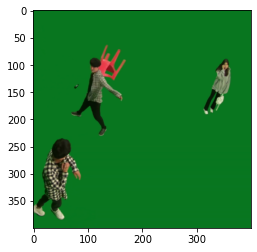

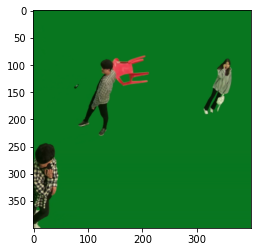

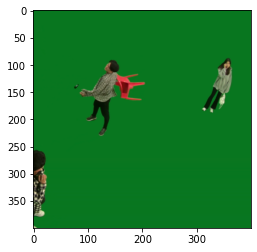

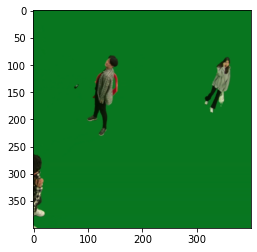

In [6]:
for f in frames:
    plt.imshow(f)
    plt.show()

In [7]:
img_filename = "C:/Users/jeong/Pictures/test_5.png"
img = plt.imread(img_filename)
img.shape

(768, 1365, 3)